<a href="https://colab.research.google.com/github/MalathiDataAnalyst/ML-Capstone-Project---Credit-Card-Fraud-Detection/blob/main/ML_Project_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project - Credit Card Fraud Detection

Problem Statement:
With the increasing prevalence of online transactions, ensuring the security of credit card transactions is very important. The objective of this project is to develop a robust machine learning model capable of accurately detecting fraudulent credit card transactions in real-time. Utilizing a dataset containing transaction details such as transaction amount, merchant category, cardholder information, transaction location, the aim is to build a predictive model that can effectively differentiate between legitimate and fraudulent transactions. By employing advanced machine learning algorithms and feature engineering techniques, the goal is to create a system that enhances fraud detection capabilities, thereby minimizing financial losses for both cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this project seeks to contribute to the development of proactive measures for securing credit card transactions and safeguarding the financial interests of stakeholders in the digital economy.

- Dataset Download: https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
df.shape

(5000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


## Exploratory Data Analysis (EDA)

1. Analyze the distribution of categorical features such as Card_Type,Merchant_Category, Location, etc

In [ ]:
df.select_dtypes(include='O').head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_DateTime,Location,Region,Cardholder_Gender,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,2020-01-01 09:43:17,Patna,East,Female,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,2020-01-03 16:26:13,Surat,West,Male,Desktop,Friday,No
2,R531NU70,Visa,Transportation,2020-01-04 03:40:49,Patna,East,Male,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,2020-01-04 14:56:24,Surat,West,Female,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,2020-01-04 17:26:47,Lucknow,North,Female,Mobile,Saturday,No


In [ ]:
categorical_col= df.select_dtypes(include='O').columns.to_list() # to_list is important to remove the particular column(Transaction id)
categorical_col.remove('Transaction_ID')
categorical_col.remove('Transaction_DateTime')


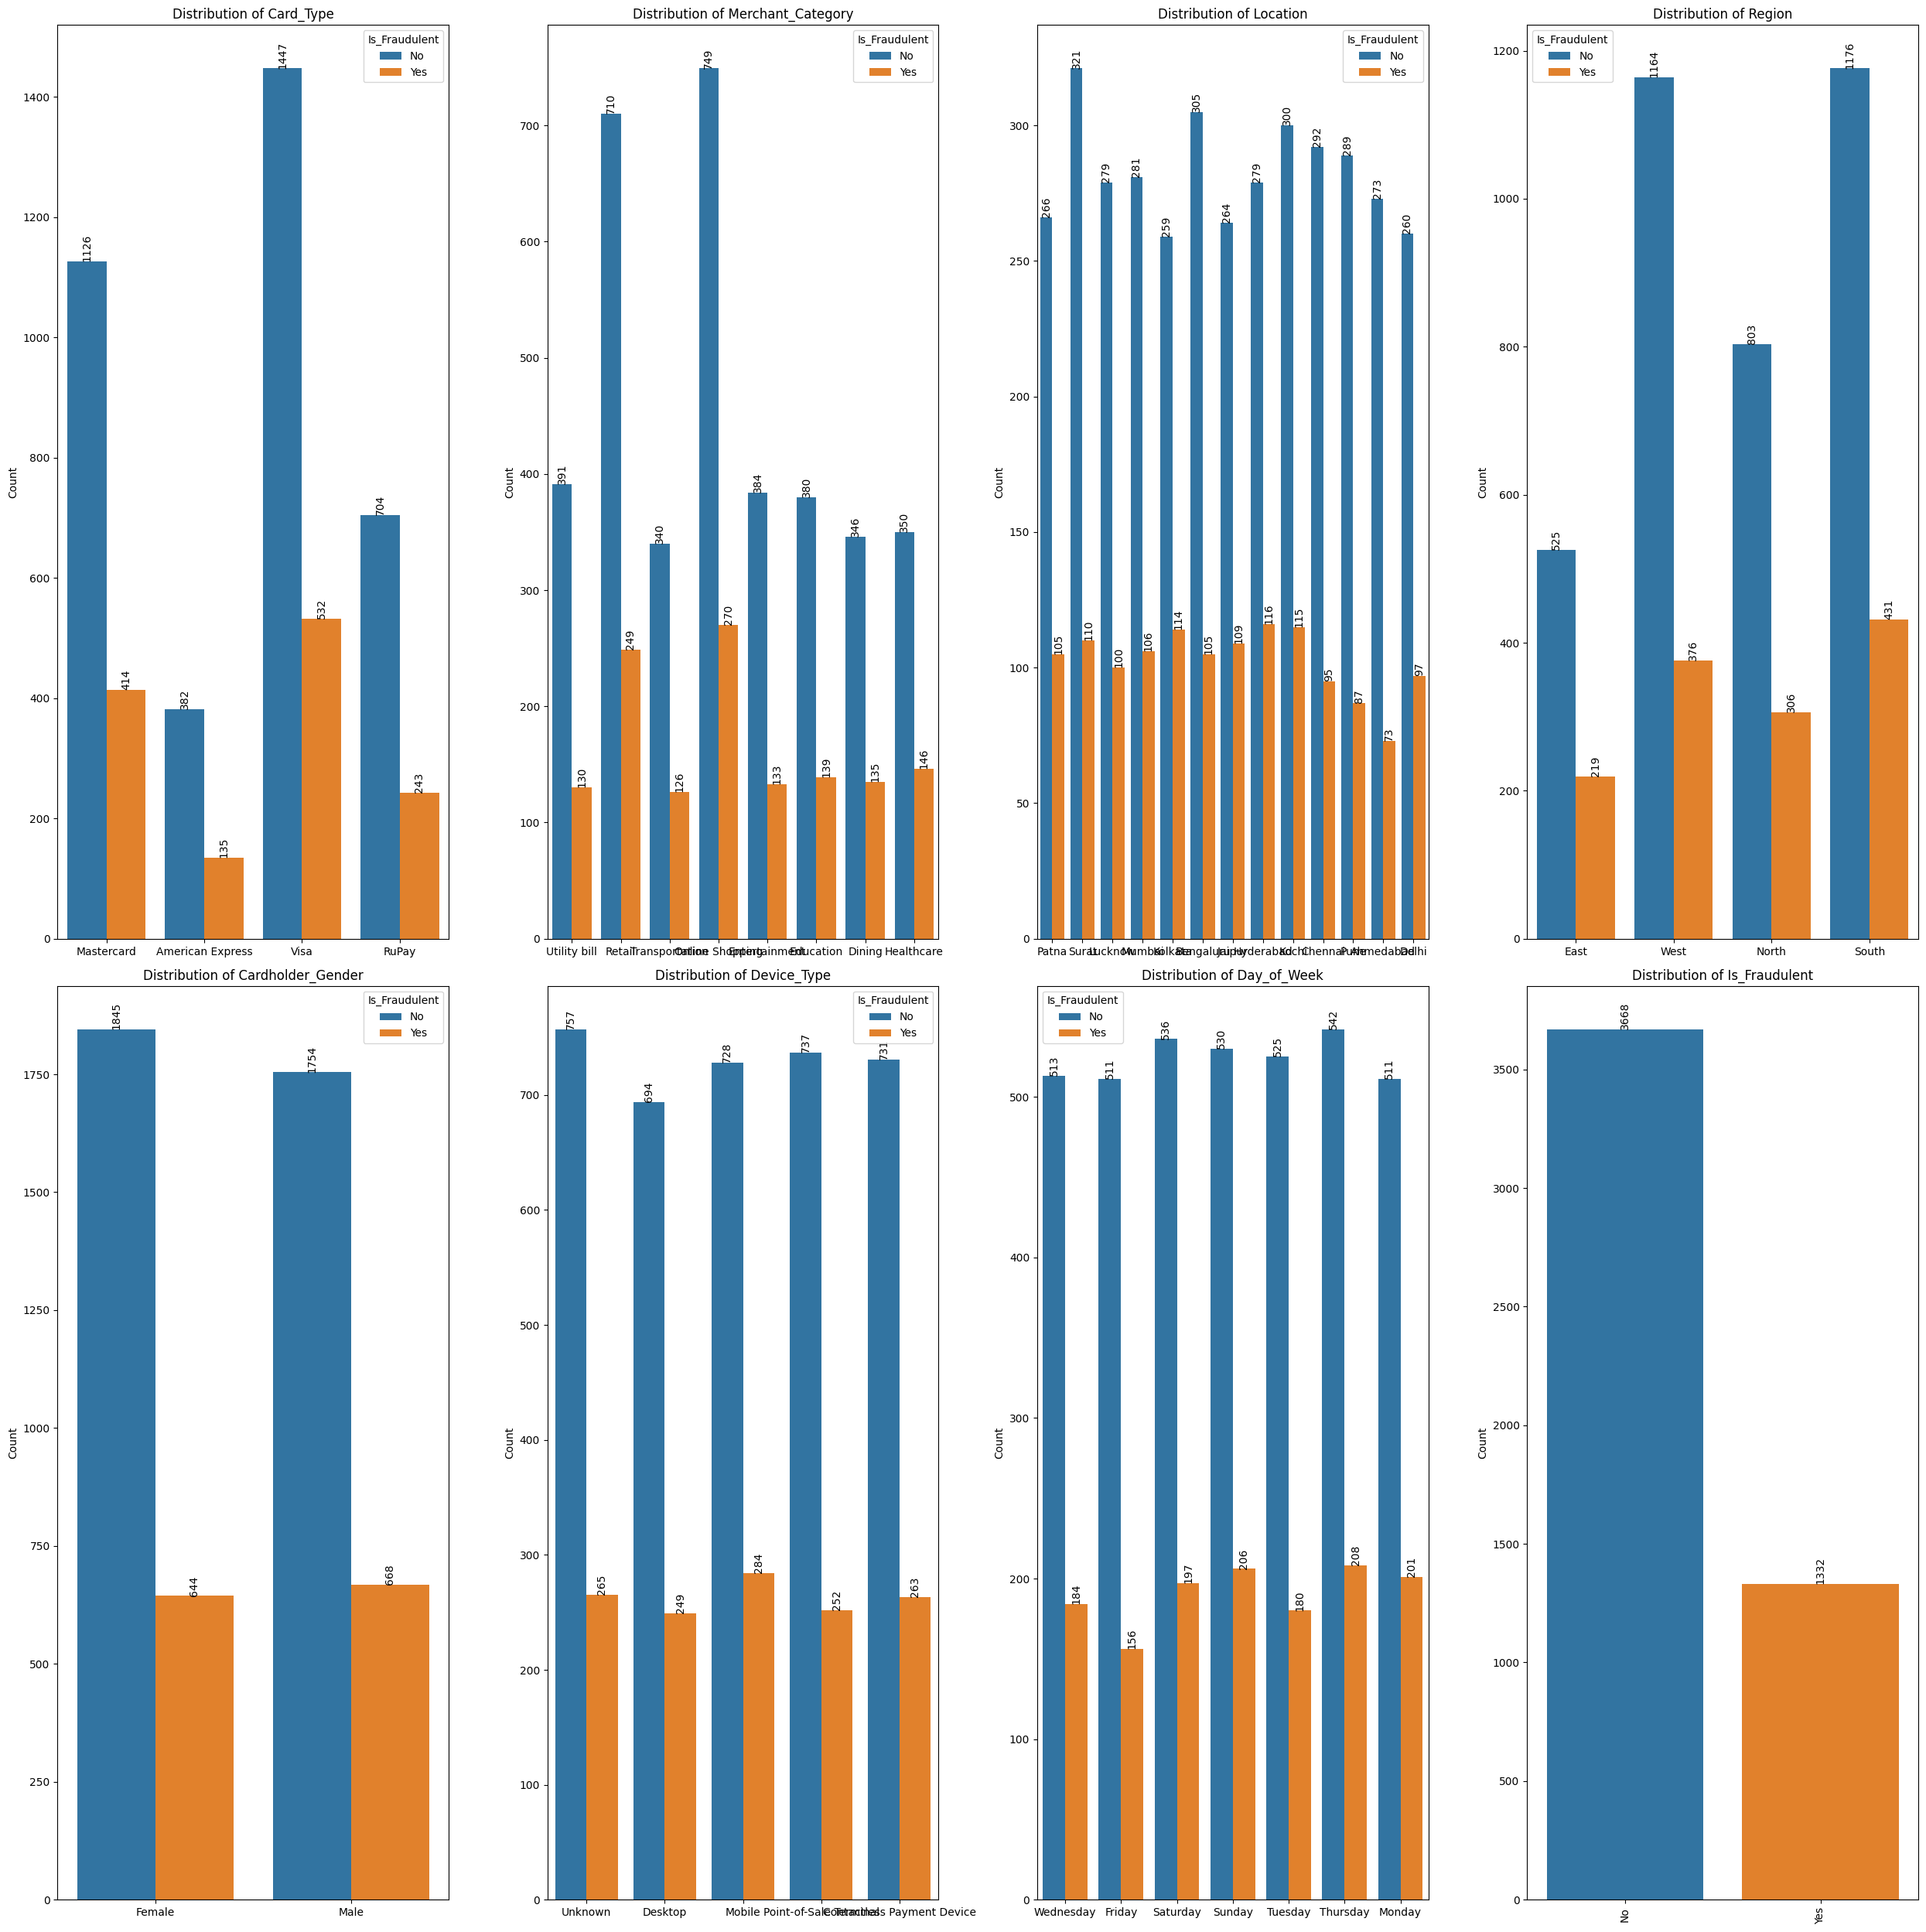

In [ ]:
fig,axes=plt.subplots(ncols=4,nrows=2,figsize=(25,25))
axes=axes.flatten()
for i,col in enumerate(categorical_col[:9]):
  ax=axes[i]
  sns.countplot(x=col,hue=(df['Is_Fraudulent']),data=df,ax=ax)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel("")
  ax.set_ylabel("Count")
  for container in ax.containers:
    ax.bar_label(container,rotation=90)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Interpretation
- In card type, non-fraudulent is higher than fraudulent, with the Visa card type having the highest fraudulent count compared to others.

- In merchant transactions, retail and online shopping have the highest fraudulent counts compared to others.

- The South region has the highest count for fraudulent and non-fraudulent.

- In Gender, both female and male have an average of fraudulent and non-fraudulent counts.

- Mobile phone cardholders have a high fraudulent count.

- Fraudulent counts are higher on weekends like Sunday.

2. Explore numerical features like Transaction_Amount, Cardholder_Age, Cardholder_Monthly_Income, and Cardholder_Average_Spend. Use descriptive statistics to understand their central tendency and spread.

In [ ]:
numberical_value=df.select_dtypes(include='number')
numberical_value

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
0,27214.0,23.0,94632.0,36369.65,100000.0
1,83956.0,49.0,148118.0,89179.12,150000.0
2,193280.0,NaN,210921.0,106668.60,200000.0
3,167381.0,52.0,148070.0,173155.52,200000.0
4,81170.0,37.0,174470.0,52713.09,200000.0
...,...,...,...,...,...
4995,36508.0,33.0,63015.0,34192.55,50000.0
4996,42920.0,NaN,NaN,19680.39,100000.0
4997,33788.0,56.0,60868.0,33876.96,50000.0
4998,38679.0,60.0,66948.0,32988.22,50000.0


In [ ]:
numberical_value.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


There is some outlier in numberical column.

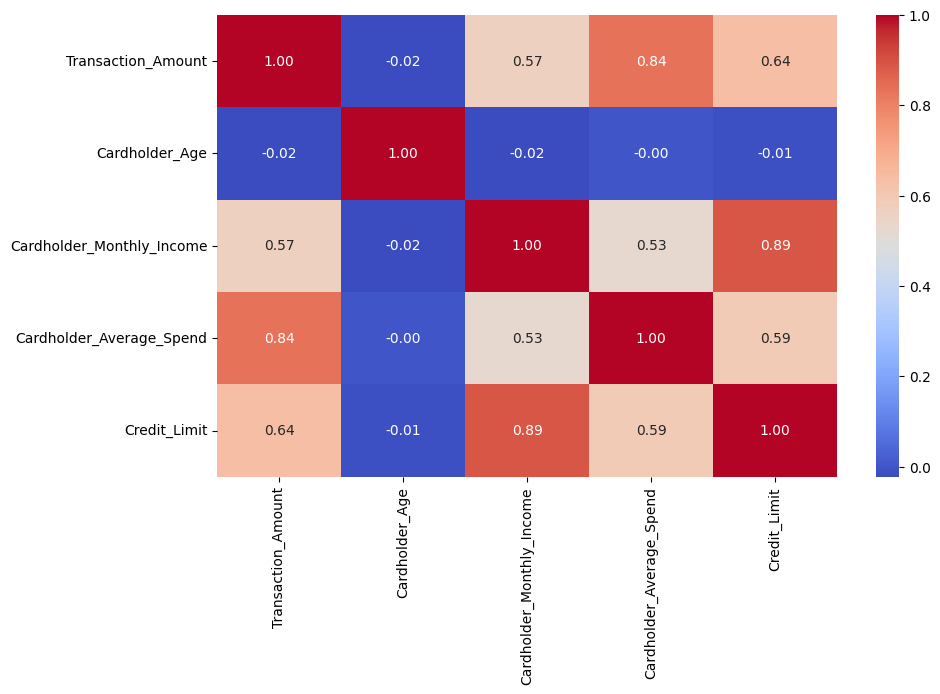

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(numberical_value.corr(),cmap='coolwarm',fmt='.2f',annot=True)
plt.show()

### Interpretation

- Older Cardholder have highest transaction amount which is (0.86).
- Credit card limit and Cardholder monthly income have highly correlated comparing to others, its rise together(0.83).
- Depends upon the Card holder Age and card holder Average amount can vary (0.83)
- Bigger credit limit means higher transaction size(0.79)

3. Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent).

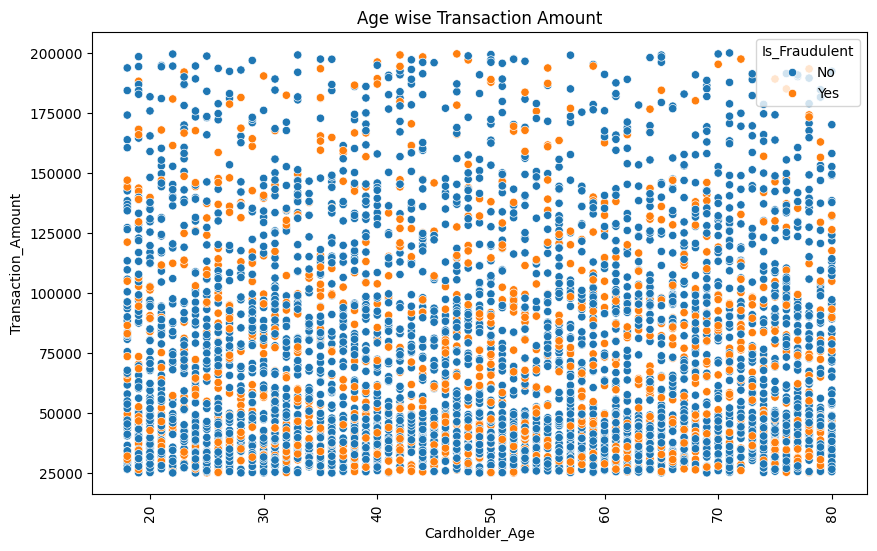

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df['Cardholder_Age'],y=df['Transaction_Amount'],hue=df['Is_Fraudulent'])
plt.xticks(rotation=90)
plt.title("Age wise Transaction Amount")
plt.show()

### Interpretation
- There is an strong relation between Card Holder Age and Transaction Amount.
- Deponds upon the age, transaction amount can varing but Age increases transaction amount also gradually increasing.

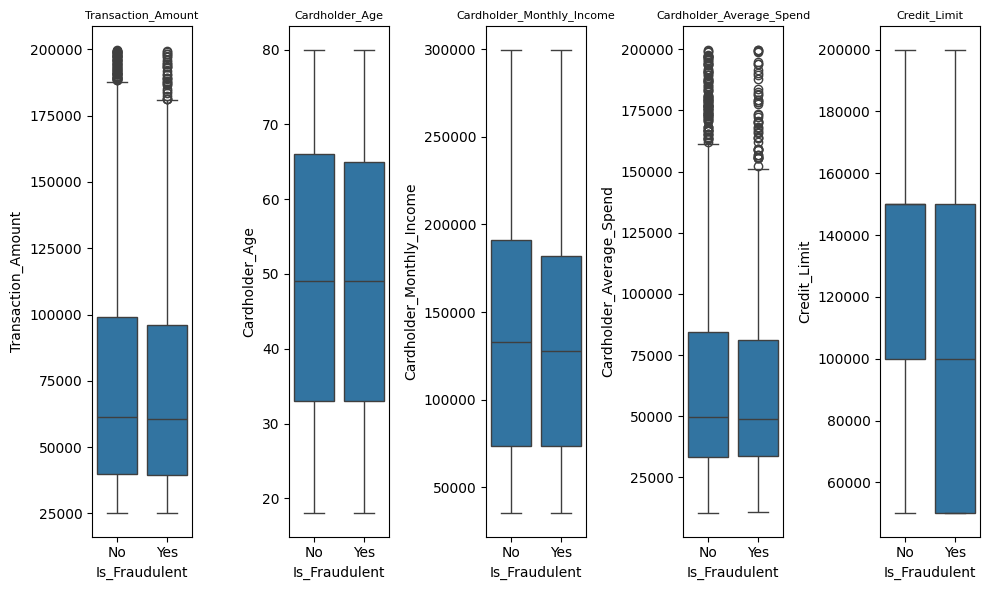

In [ ]:
fig,axes=plt.subplots(ncols=5,nrows=1,figsize=(10,6))
axes=axes.flatten()

for i,col in enumerate(numberical_value[:5]):
  ax=axes[i]
  sns.boxplot(x=df['Is_Fraudulent'],y=col,data=df,ax=ax)
  ax.set_title(f"{col}",fontsize=8)

plt.tight_layout()
plt.show()

## Interpretation

- There is an outlier in transaction amount and cardholder average spend.

- The transaction amount lies in the range between 40000 and 100000.

- Average of 35-65 Age card holder have fraudulent.

- Credit card user having the highest limit with fraudulent.

4. Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.

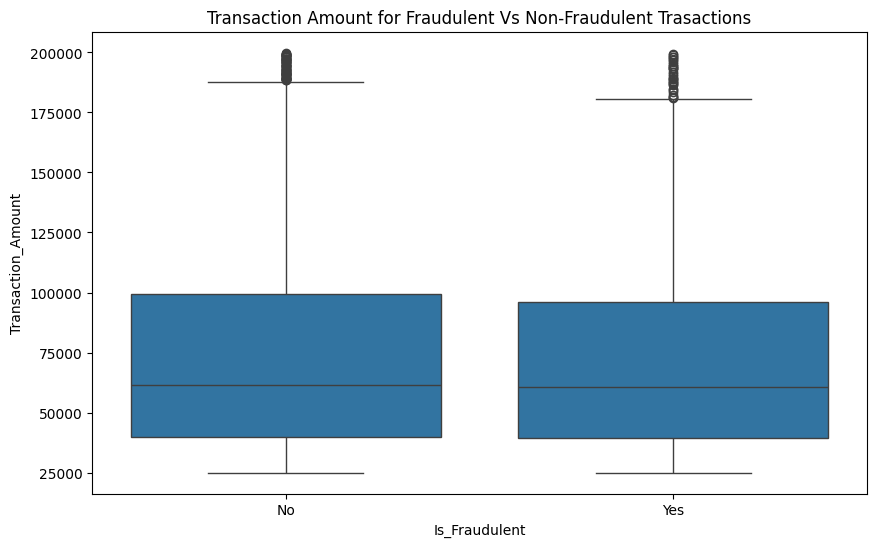

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Transaction_Amount'],x=df['Is_Fraudulent'])
plt.title("Transaction Amount for Fraudulent Vs Non-Fraudulent Trasactions")
plt.show()


### Interpretation
- There is an outlier in both Fraudulent and Non Fraudulent
- Range between the Fraudulent and Non Fraudulent is 50000 and 100000
- It is above in the range of above 180000,its extremely high outliers

5.  Investigate whether certain features are more susceptible to fraud.

- In card type,the Visa card type having the highest fraudulent count compared to others.

- In merchant transactions, retail and online shopping have the highest fraudulent counts compared to others.

- The South region has the highest count for fraudulent.

- In Gender,Male have an highest of fraudulent.

- Mobile phone cardholders have a high fraudulent count.

- Fraudulent counts are higher on weekends like Sunday.

- Average of 35-65 Age card holder have fraudulent.

- Credit card user having the highest limit with fraudulent.

- Fraudulent count 1332 as lesser than non Fraudulent count 3638.

In [ ]:
df['Is_Fraudulent'].value_counts()

,count
Is_Fraudulent,
No,3668
Yes,1332


## Data Preprocessing - Data Cleaning

- Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
df['Card_Type']=df['Card_Type'].fillna(df['Card_Type'].mode()[0])

In [ ]:
df['Merchant_Category']=df['Merchant_Category'].fillna(df['Merchant_Category'].mode()[0])

In [ ]:
df['Transaction_Amount']=df['Transaction_Amount'].fillna(df['Transaction_Amount'].median())

In [ ]:
df['Cardholder_Age']=df['Cardholder_Age'].fillna(df['Cardholder_Age'].mean())

In [ ]:
df['Cardholder_Gender']=df['Cardholder_Gender'].fillna(df['Cardholder_Gender'].mode()[0])

In [ ]:
df['Cardholder_Monthly_Income']=df['Cardholder_Monthly_Income'].fillna(df['Cardholder_Monthly_Income'].median())

In [ ]:
df['Cardholder_Average_Spend']=df['Cardholder_Average_Spend'].fillna(df['Cardholder_Average_Spend'].median())

In [ ]:
df['Credit_Limit']=df['Credit_Limit'].fillna(df['Credit_Limit'].median())

In [ ]:
df['Device_Type']=df['Device_Type'].fillna(df['Device_Type'].mode()[0])

- Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.

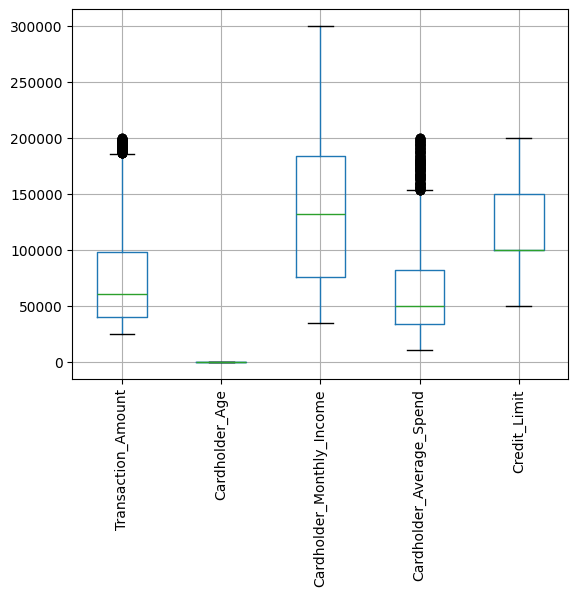

In [ ]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Transaction Amount
q1=df['Transaction_Amount'].quantile(0.25)
q3=df['Transaction_Amount'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q1+1.5*IQR

In [ ]:
lower_bound

np.float64(-48155.625)

In [ ]:
upper_bound

np.float64(127649.625)

In [ ]:
q1= df['Cardholder_Average_Spend'].quantile(0.25)
q3=df['Cardholder_Average_Spend'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q1+1.5*IQR

In [ ]:
lower_bound

np.float64(-37872.990000000005)

In [ ]:
upper_bound

np.float64(105746.865)

In [ ]:
newdf=df[['Cardholder_Average_Spend','Transaction_Amount']]
newdf.shape

(5000, 2)

In [ ]:
newdf= df[(df['Transaction_Amount']>lower_bound) & (df['Transaction_Amount']<upper_bound) &
          (df['Cardholder_Average_Spend']> lower_bound) & (df['Cardholder_Average_Spend']< upper_bound)]
newdf.shape

(3790, 15)

In [ ]:
#Outlier Removal
#5000-3790 = 1210 # outlier Removed

3. Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed

In [ ]:
newdf[['Cardholder_Average_Spend','Transaction_Amount']].skew()

,0
Cardholder_Average_Spend,0.739495
Transaction_Amount,0.630294


It is positively skewed, there is no need for log or square transformation.

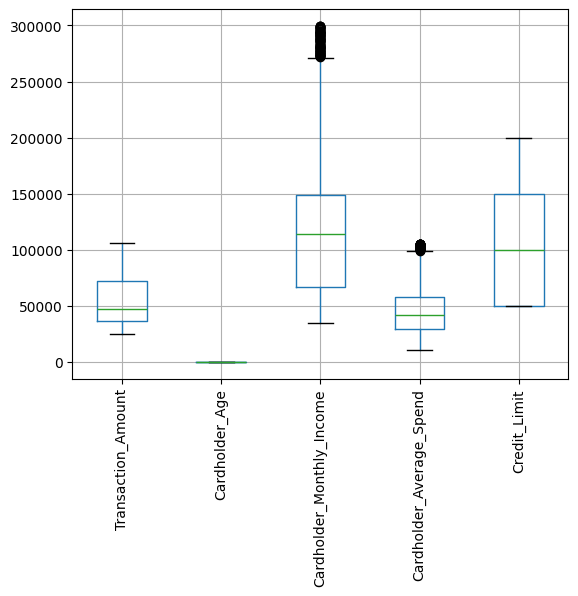

In [ ]:
newdf.boxplot()
plt.xticks(rotation=90)
plt.show()

##  Feature Engineering

1. Identify the categorical features in the dataset

In [ ]:
categorical_col

['Card_Type',
 'Merchant_Category',
 'Location',
 'Region',
 'Cardholder_Gender',
 'Device_Type',
 'Day_of_Week',
 'Is_Fraudulent']

2. Encode categorical features to numerical using techniques like one-hot encoding or label encoding techniques to prepare the data for machine learning algorithms.

In [ ]:
newdf.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
newdf =newdf.copy()
for col in categorical_col:
  le=LabelEncoder()
  newdf[col]=le.fit_transform(newdf[col])

## Feature Selection

- Select relevant features that have the most impact on predicting fraudulent transactions.
- Identify and remove redundant or irrelevant features that do not contribute significantly to the prediction task.

In [ ]:
X = newdf.drop(columns=['Transaction_ID','Is_Fraudulent','Transaction_DateTime'])
y= newdf['Is_Fraudulent']

##  Split data into training and testing

- Divide the dataset into training and testing sets to evaluate the model's performance.
- Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

##  Feature Scaling

- Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.
- Common scaling techniques include Min-Max scaling or Standardization (Z-score normalization).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in numberical_value:
  X_train[col]=scaler.fit_transform(X_train[[col]])
  X_test[col]=scaler.transform(X_test[[col]])

##  Build the Machine Learning Model

- Import the necessary modules and libraries for building and evaluating machine learning models.
- Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.
- Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.
- Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.
- Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [ ]:
classifier = {
    LogisticRegression : LogisticRegression(class_weight="balanced",random_state=42),
    GaussianNB: GaussianNB(),
    DecisionTreeClassifier: DecisionTreeClassifier(class_weight="balanced",random_state=42),
    RandomForestClassifier: RandomForestClassifier(class_weight="balanced",random_state=42),
    KNeighborsClassifier: KNeighborsClassifier(),
    SVC: SVC(class_weight="balanced",random_state=42)
}

In [ ]:
result=[]
for name,clf in classifier.items():
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred,average='weighted',zero_division=0) #average for multiclass
  precision=precision_score(y_test,y_pred,zero_division=0) #zero division avoids the userwarning
  rec=recall_score(y_test,y_pred,zero_division=0)
  con=confusion_matrix(y_test,y_pred)
  result.append({'Model Name':name.__name__, #it returns class name only
                 'Accuracy Score':acc,
                 'F1 Score':f1,
                 'Precision Score':precision,
                 'Recall Score':rec,
                 'Confusion Matrix': con})
  result_df=pd.DataFrame(result).sort_values(by='F1 Score',ascending=False)


In [ ]:
result_df

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score,Confusion Matrix
1,GaussianNB,0.748945,0.641437,0.000000,0.000000,"[[710, 0], [238, 0]]"
3,RandomForestClassifier,0.740506,0.639173,0.100000,0.004202,"[[701, 9], [237, 1]]"
4,KNeighborsClassifier,0.660338,0.626343,0.195652,0.113445,"[[599, 111], [211, 27]]"
2,DecisionTreeClassifier,0.619198,0.624385,0.262548,0.285714,"[[519, 191], [170, 68]]"
0,LogisticRegression,0.518987,0.548952,0.226131,0.378151,"[[402, 308], [148, 90]]"
5,SVC,0.514768,0.546963,0.254425,0.483193,"[[373, 337], [123, 115]]"


## Interpretation
- GaussianNb have highest accuracy score of 0.7489 followed by Random forest gives the second highest score.
- But SVC gives lease Accuracy score and F1 score.
- Hypertuning the parameters can vary the accuracy points.

5. Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.

In [ ]:
#SVM
svm_grid ={ 'C':[1.5,2,2.5], 'kernel':['linear','rbf']}
svm=GridSearchCV(SVC(),svm_grid,cv=3,scoring='accuracy')
svm.fit(X_train,y_train)
print("Best Parameter:",svm.best_params_)
print("Best Accuracy:",svm.best_score_)
y_pred=svm.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))


Best Parameter: {'C': 1.5, 'kernel': 'linear'}
Best Accuracy: 0.718508146979803
Accuracy Score: 0.7489451476793249
F1 Score: 0.0


In [ ]:
# K-Nearest Neighbor

knn_grid ={'n_neighbors':[3,4,5],'weights':['uniform','distance']}
knn=GridSearchCV(KNeighborsClassifier(),knn_grid,cv=3,scoring='accuracy')
knn.fit(X_train,y_train)
print("Best Parameter:",knn.best_params_)
print("Best Accuracy:",knn.best_score_)
y_pred=knn.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))


Best Parameter: {'n_neighbors': 4, 'weights': 'uniform'}
Best Accuracy: 0.691062307947074
Accuracy Score: 0.70042194092827
F1 Score: 0.08387096774193549


In [ ]:
from sklearn.model_selection import GridSearchCV

#Random Forest
random_grid = {'max_depth': [100,150,200],
              'n_estimators': [5,7,9]}
rf =GridSearchCV(RandomForestClassifier(),random_grid,cv=3,scoring='accuracy')
rf.fit(X_train,y_train)
print("Best Parameter:",rf.best_params_)
print("Best Accuracy:",rf.best_score_)
y_pred=rf.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))


Best Parameter: {'max_depth': 100, 'n_estimators': 9}
Best Accuracy: 0.6706517880879289
Accuracy Score: 0.6729957805907173
F1 Score: 0.09883720930232558


In [ ]:
# Decision Tree
decision_grid ={ 'max_depth':[5,7,9]}
dt=GridSearchCV(DecisionTreeClassifier(),decision_grid,cv=3,scoring='accuracy')
dt.fit(X_train,y_train)
print("Best Parameter:",dt.best_params_)
print("Best Accuracy:",dt.best_score_)
y_pred=dt.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Best Parameter: {'max_depth': 5}
Best Accuracy: 0.706543129016496
Accuracy Score: 0.7436708860759493
F1 Score: 0.039525691699604744


In [ ]:
#Logistic Regression
log_grid ={ 'C':[8,9,11], 'max_iter':[500,750,1000]}
Log=GridSearchCV(LogisticRegression(),log_grid,cv=3,scoring='accuracy')
Log.fit(X_train,y_train)
print("Best Parameter:",Log.best_params_)
print("Best Accuracy:",Log.best_score_)
y_pred=Log.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Best Parameter: {'C': 8, 'max_iter': 500}
Best Accuracy: 0.718508146979803
Accuracy Score: 0.7489451476793249
F1 Score: 0.0


## Model Interpretation
- Logistic Regression -> Accuracy score of 74% with max iteration (500).
- K-Nearest Neighbor -> Accuracy score of 70% with weights (uniform) and best neighbors is 4.
- Support Vector Classifier -> Accuracy score of 74% with linear kernal and margin(1.5).
- Random Forest Classifier -> Accuracy score of 67%
with max depth(100) and N-Estimator (9).
- Decision Tree Classifier -> Accuracy score of 74%
with max depth 5.
- Before SVC has least score, after hypertuning SVC has the highest score.Logistic also have highest score with max iteration 500.